In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
netflix = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#show total missing value
missing_data = netflix.isnull().sum()
missing_data[0:10]

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
dtype: int64

In [4]:
#drop column show_id
netflix.drop(columns = netflix.columns[0], axis = 1, inplace = True)


In [5]:
netflix.dropna(subset=['date_added', 'rating','duration'], inplace = True)
netflix[netflix.isnull().sum(axis = 1) > 2].count()

type            96
title           96
director         0
cast             0
country          0
date_added      96
release_year    96
rating          96
duration        96
listed_in       96
description     96
dtype: int64

In [6]:
netflix.fillna('Unknown', inplace = True)
netflix.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
movie_counts = netflix['release_year'].value_counts().sort_index()
# Create the bar chart
fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))
# Set the dark background and white font color
fig.update_layout(
    plot_bgcolor='rgb(10, 10, 10)',  # Dark background color
    paper_bgcolor='rgb(10, 10, 10)',  # Dark background color for the plot area
    font_color='white',  # White font color
    title='Number of Movies Released Each Year',  # Chart title
    xaxis=dict(title='Year'),  # X-axis label
    yaxis=dict(title='Number of Movies')  # Y-axis label
)
fig.update_traces(marker_color='blue')
fig.show()

In [9]:
movie_type_counts = netflix['type'].value_counts()

# Create the pie chart
fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

# Set the dark background and white font color
fig.update_layout(
    plot_bgcolor='rgb(10, 10, 10)',  # Dark background color
    paper_bgcolor='rgb(10, 10, 10)',  # Dark background color for the plot area
    font_color='white',  # White font color
    title='Distribution of C. Types',  # Chart title
)
fig.update_traces(marker=dict(colors=['red']))
fig.show()

In [10]:
top_countries = netflix['country'].value_counts().head(10)
# Create the treemap
fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)
# Set the dark background and white font color
fig.update_layout(
    plot_bgcolor='rgb(10,10, 10)',  # Dark background color
    paper_bgcolor='rgb(10, 10, 10)',  # Dark background color for the plot area
    font_color='white',  # White font color
    title='Top Countries with Highest Number of Movies',  # Chart title
)
fig.show()

In [11]:
country_movie_counts = netflix['country'].value_counts()

# Create a DataFrame with country names and movie counts
data = pd.DataFrame({'Country': country_movie_counts.index, 'Movie Count': country_movie_counts.values})

# Create the world map
fig = px.choropleth(data_frame=data, locations='Country', locationmode='country names',
                    color='Movie Count', title='Number of Movies Released By Country',
                    color_continuous_scale='Reds', range_color=(0, data['Movie Count'].max()),
                    labels={'Movie Count': 'Number of Movies'})

# Set the dark background and white font color
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  # Dark background color
    paper_bgcolor='rgb(17, 17, 17)',  # Dark background color for the plot area
    font_color='white'  # White font color
)
fig.show()

In [12]:
ratings       = list(netflix['rating'].value_counts().index)
rating_counts = list(netflix['rating'].value_counts().values)

# Plotly bar plot
fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

# Set layout
fig.update_layout(
    title='Movie Ratings Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

# Display the plot
fig.show()

In [13]:
ratings       = list(netflix['duration'].value_counts().index)
rating_counts = list(netflix['duration'].value_counts().values)

# Plotly bar plot
fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

# Set layout
fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

# Display the plot
fig.show()

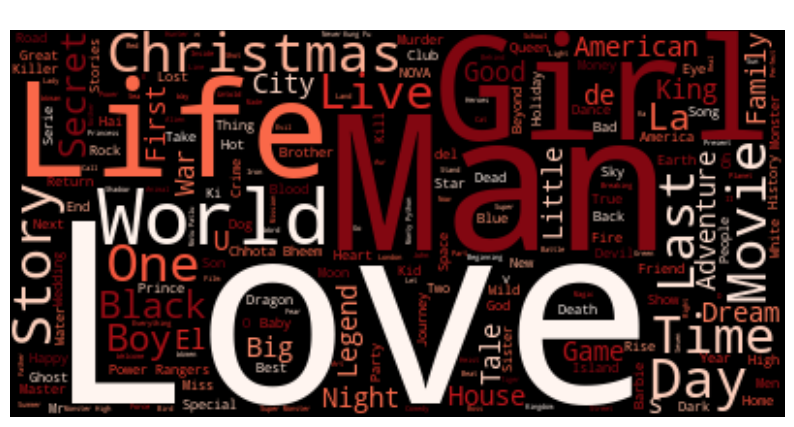

In [14]:
# Extract titles from the Netflix dataset
titles = netflix['title'].values

# Combine all titles into a single string
text = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()

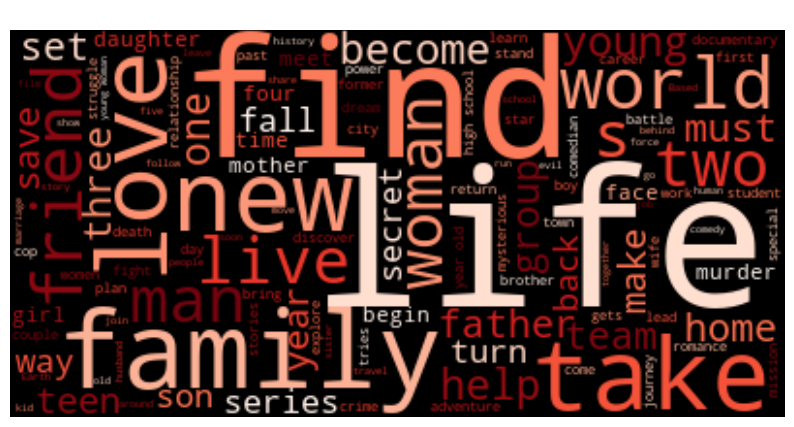

In [15]:
# Extract titles from the Netflix dataset
titles = netflix['description'].values

# Combine all titles into a single string
text = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

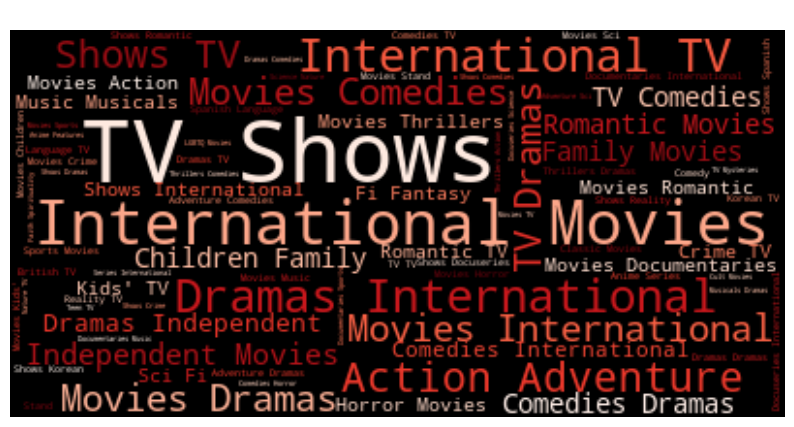

In [16]:
# Extract titles from the Netflix dataset
titles = netflix['listed_in'].values

# Combine all titles into a single string
text = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()